In [300]:
import numpy as np

In [301]:
import pandas as pd

In [302]:
import matplotlib.pyplot as plt

In [303]:
import seaborn as sns

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [306]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [307]:
from sklearn.ensemble import RandomForestRegressor

In [308]:
df = pd.read_csv(r'/home/oloche/Downloads/train_and_test2.csv')

In [309]:
df.shape

(1309, 28)

In [310]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [311]:
df.tail()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1308,1309,28.0,22.3583,0,1,0,0,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [313]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [314]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [315]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [316]:
df.duplicated().sum()

0

In [317]:
df.nunique()

Passengerid    1309
Age              98
Fare            281
Sex               2
sibsp             7
zero              1
zero.1            1
zero.2            1
zero.3            1
zero.4            1
zero.5            1
zero.6            1
Parch             8
zero.7            1
zero.8            1
zero.9            1
zero.10           1
zero.11           1
zero.12           1
zero.13           1
zero.14           1
Pclass            3
zero.15           1
zero.16           1
Embarked          3
zero.17           1
zero.18           1
2urvived          2
dtype: int64

In [318]:
df.corr()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Passengerid,1.000000,0.025799,0.031128,-0.013406,-0.055224,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.038354,NaN,NaN,-0.051518,NaN,NaN,-0.331493
Age,0.025799,1.000000,0.178182,-0.053663,-0.189972,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.377908,NaN,NaN,-0.065125,NaN,NaN,-0.055862
Fare,0.031128,0.178182,1.000000,0.185681,0.160349,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.558683,NaN,NaN,-0.239212,NaN,NaN,0.173786
Sex,-0.013406,-0.053663,0.185681,1.000000,0.109609,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.124617,NaN,NaN,-0.099408,NaN,NaN,0.404020
sibsp,-0.055224,-0.189972,0.160349,0.109609,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.060832,NaN,NaN,0.066055,NaN,NaN,-0.014375
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
df.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [320]:
df.head(60)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


In [321]:
df = df.dropna()

In [322]:
scaler = StandardScaler()

In [323]:
numeric_features = df.select_dtypes(include=[np.number]).columns

In [324]:
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [325]:
label_encoders = {}

In [326]:
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [327]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

(array([44., 43., 43., 44., 43., 44., 44., 43., 44., 43., 44., 44., 43.,
        44., 43., 44., 44., 43., 44., 42., 44., 44., 43., 44., 43., 44.,
        44., 43., 44., 44.]),
 array([-1.73202385e+00, -1.61661203e+00, -1.50120022e+00, -1.38578840e+00,
        -1.27037658e+00, -1.15496476e+00, -1.03955294e+00, -9.24141122e-01,
        -8.08729303e-01, -6.93317485e-01, -5.77905666e-01, -4.62493848e-01,
        -3.47082029e-01, -2.31670210e-01, -1.16258392e-01, -8.46573148e-04,
         1.14565245e-01,  2.29977064e-01,  3.45388883e-01,  4.60800701e-01,
         5.76212520e-01,  6.91624338e-01,  8.07036157e-01,  9.22447976e-01,
         1.03785979e+00,  1.15327161e+00,  1.26868343e+00,  1.38409525e+00,
         1.49950707e+00,  1.61491889e+00,  1.73033071e+00]),
 <BarContainer object of 30 artists>)

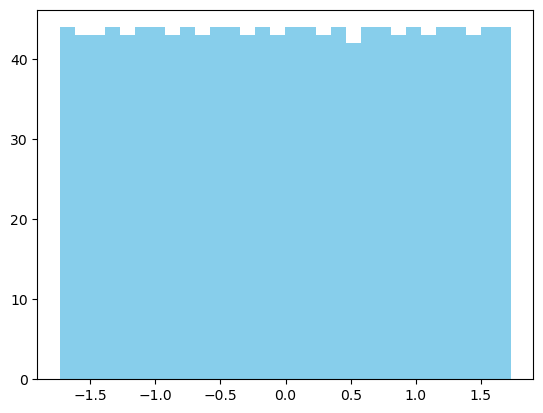

In [328]:
plt.hist(df[numeric_features[0]], bins=30, color='skyblue')

Text(0.5, 1.0, 'Distribution of Passengerid')

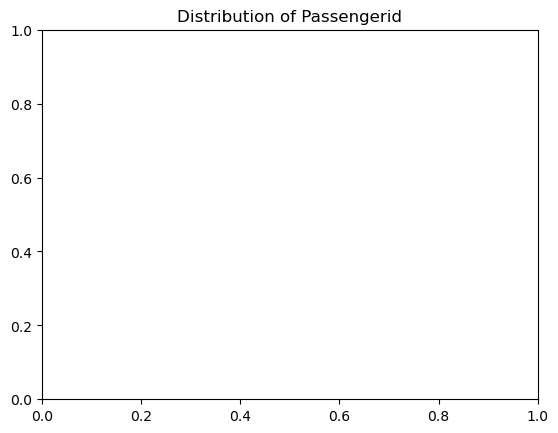

In [329]:
plt.title('Distribution of {}'.format(numeric_features[0]))

Text(0.5, 0, 'Passengerid')

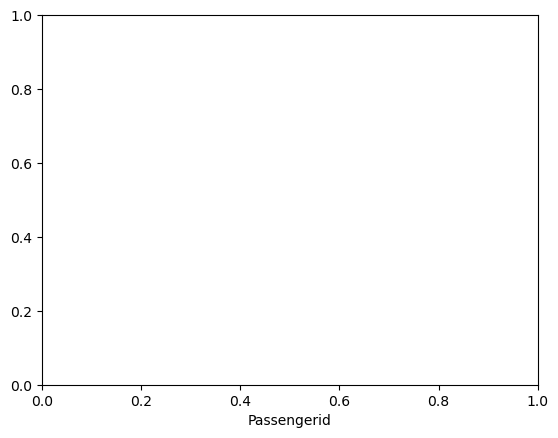

In [330]:
plt.xlabel(numeric_features[0])

Text(0, 0.5, 'Frequency')

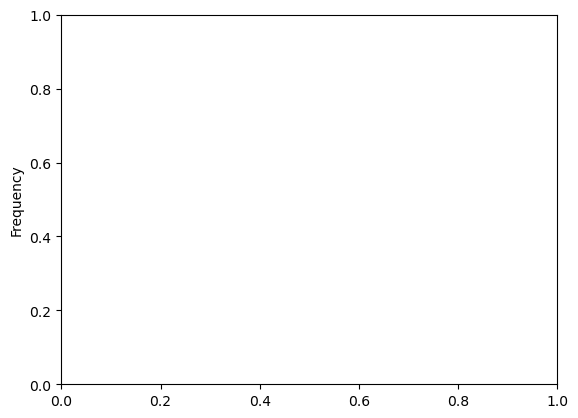

In [331]:
plt.ylabel('Frequency')

In [332]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<AxesSubplot: >

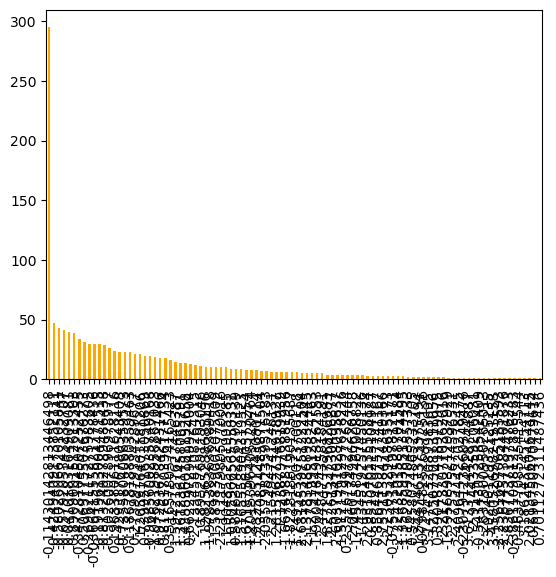

In [333]:
df[numeric_features[1]].value_counts().plot(kind='bar', color='orange')

Text(0.5, 1.0, 'Bar Chart of Age')

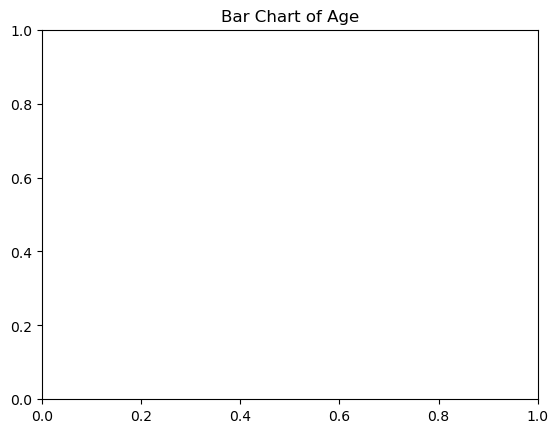

In [334]:
plt.title('Bar Chart of {}'.format(numeric_features[1]))

Text(0.5, 0, 'Age')

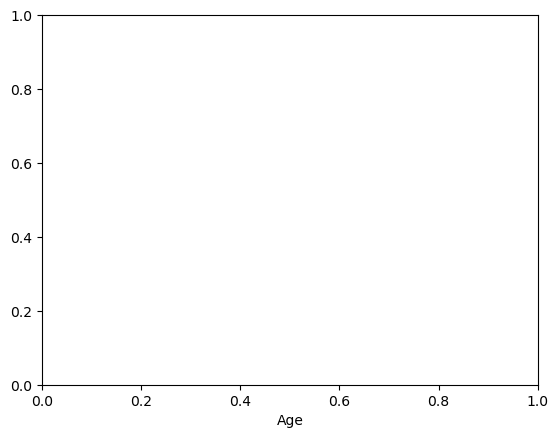

In [335]:
plt.xlabel(numeric_features[1])

Text(0, 0.5, 'Count')

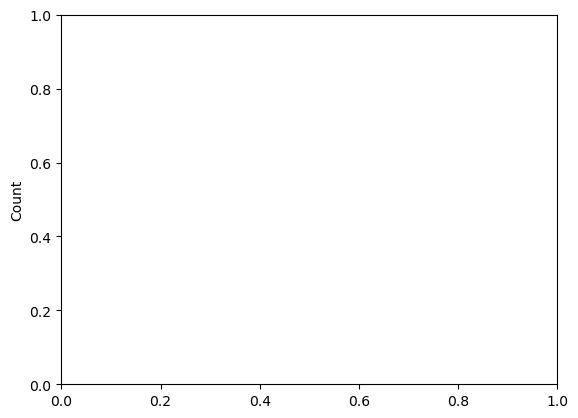

In [336]:
plt.ylabel('Count')

In [337]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<AxesSubplot: >

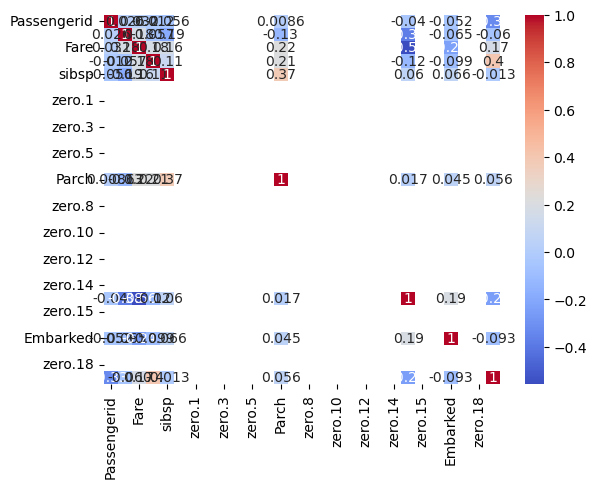

In [338]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

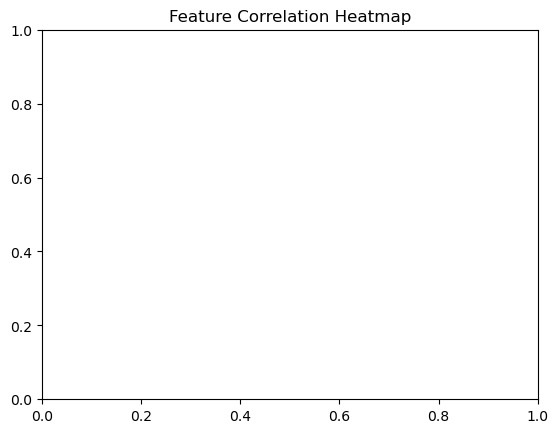

In [339]:
plt.title('Feature Correlation Heatmap')

In [340]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<AxesSubplot: xlabel='Fare'>

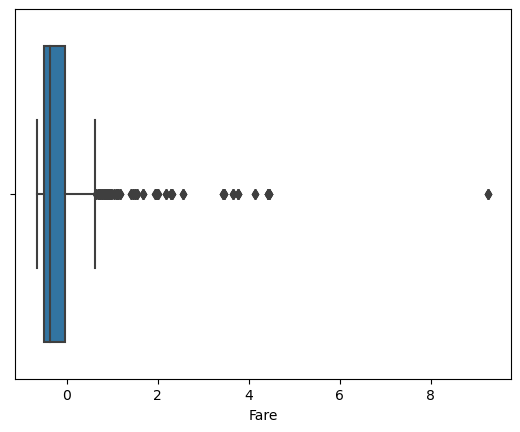

In [341]:
sns.boxplot(x=df[numeric_features[2]])

Text(0.5, 1.0, 'Boxplot of Fare')

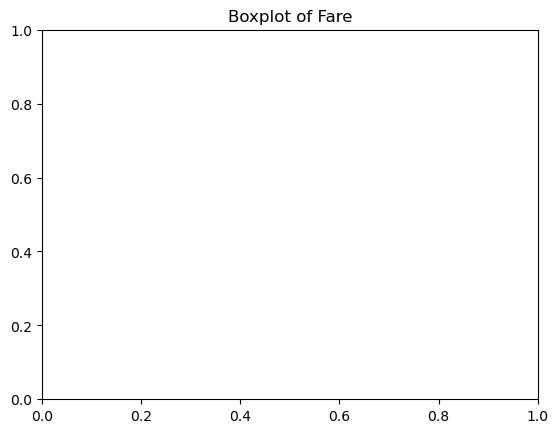

In [342]:
plt.title('Boxplot of {}'.format(numeric_features[2]))

In [343]:
X = df.drop('2urvived', axis=1)

In [344]:
Y = df['2urvived']

In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [346]:
model = RandomForestRegressor(random_state=42)

In [347]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [348]:
Y_pred = model.predict(X_test)

In [349]:
print("MAE:", mean_absolute_error(Y_test, Y_pred))

MAE: 0.4195742684863344


In [350]:
print("MSE:", mean_squared_error(Y_test, Y_pred))

MSE: 0.5810798666084053


In [351]:
mse = mean_squared_error(Y_test, Y_pred)

In [352]:
rmse = np.sqrt(mse)

In [353]:
print("RMSE", rmse)

RMSE 0.7622859480591291


In [354]:
print("R2 Score:", r2_score(Y_test, Y_pred))

R2 Score: 0.4624270758122744
